# Quarta esperienza

## Import dipendenze

In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.ticker as mticker

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250

## Misura dello slew rate

In [94]:
V_i = 0.5
nu = 50000
Trise_10_90 =  1

## Misura del GxBW

In [95]:
# Frequenze suggerite:
print(np.logspace(1,2.8, 4, base=10).round(-1))
print(np.logspace(2.8,5.5, 20,base=10).round(-1)[1:])
print(np.logspace(5.5, 6, 3,).round(-4)[1:])


[ 10.  40. 160. 630.]
[   880.   1210.   1680.   2340.   3240.   4490.   6230.   8650.  11990.
  16640.  23080.  32010.  44400.  61580.  85420. 118490. 164360. 227980.
 316230.]
[ 560000. 1000000.]


In [96]:
R = 1000
R_primo = np.array([4700, 33000, 100000, 220000])

In [97]:
nu=np.array([9.01,40.64,160.5,630,888,1210,1688,2300,3240,4470,6350,8650,12300,16560,22950,31900,44200,61501,85500,118900,163900,227000,318900,556000,1000000])

V_in_1 = np.array([261,261,263,262,261,263,262,263,265,263,75.2,75.2,75.2,75.2,75.2,75.2,74.8,74.8,75.4,75.6,76.8,77.2,77.2,77.2,77.2])*1e-3 #circa 1V
V_out_1 =np.array([1.2, 1.27,1.21,1.29,1.31,1.21,1.21,1.21,1.21,1.21,0.358,0.350,0.350,0.346,0.344,0.338,0.330,0.318,0.292,0.261,0.221,0.179,0.133,0.0776,0.0422])

V_in_2 = np.array([261,261,263,263,262,262,263,263,264,263,75,75.2,75.2,75.4,75.4,76,76.2,76.8,77,77.2,78,77.6,77.6,77.6,77.2])*1e-3 #circa 0.1V
V_out_2 =np.array([3.84,3.82,3.8,3.8,3.86,3.8,3.8,3.8,3.79,3.78,1.09,1.07,1.05,1.03,0.975,0.895,0.775,0.647,0.509,0.380,0.287,0.211,0.148,0.084,0.0454])

V_in_3 = np.array([261,262,263,262,263,262,262,264,264,264,75.4,76,76.4,77,77.4,77.8,77.6,77.6,77.8,77.8,77.6,77.6,77.2,77.2,77.2])*1e-3 #circa 0.05V
V_out_3 =np.array([12.1,12.1,12.1,12.1,12.1,12.1,12,12,11.7,11.4,3.2,3.03,2.69,2.33,1.91,1.42,1.07,0.780,0.575,0.420,0.302,0.219,0.154,0.088,0.0454])

V_in_4 = np.array([262,262,262,263,263,263,264,265,267,270,76.4,77.4,77.8,77.8,78.2,77.8,77.8,78,78,77.8,78,77.6,77.6,77.6,77.2])*1e-3 #Circa 0.03V
V_out_4 =np.array([26,26,26.2,25.9,25.9,25.6,25.3,24.5,22.7,20.6,5.51,4.7,3.7,2.83,2.14,1.52,1.12,0.805,0.583,0.424,0.304,0.223,0.155,0.088,0.0452])

print(len(nu))
print(len(V_out_1))
print(len(V_in_1))
print(len(V_out_2))
print(len(V_in_2))
print(len(V_out_3))
print(len(V_in_3))
print(len(V_out_4))
print(len(V_in_4))


25
25
25
25
25
25
25
25
25


In [98]:
A_1, A_2, A_3, A_4 = V_out_1/V_in_1, V_out_2/V_in_2, V_out_3/V_in_3, V_out_4/V_in_4

G_BW_1 = A_1*nu
G_BW_2 = A_2*nu
G_BW_3 = A_3*nu
G_BW_4 = A_4*nu

G_1, G_2, G_3, G_4 = 20*np.log10(A_1), 20*np.log10(A_2), 20*np.log10(A_3), 20*np.log10(A_4)

In [99]:
sigmaV = lambda a: a*0.03
sigmaNu = lambda a: a*0.03
sigmaG = np.sqrt(2)*(3/5)/np.log(10)

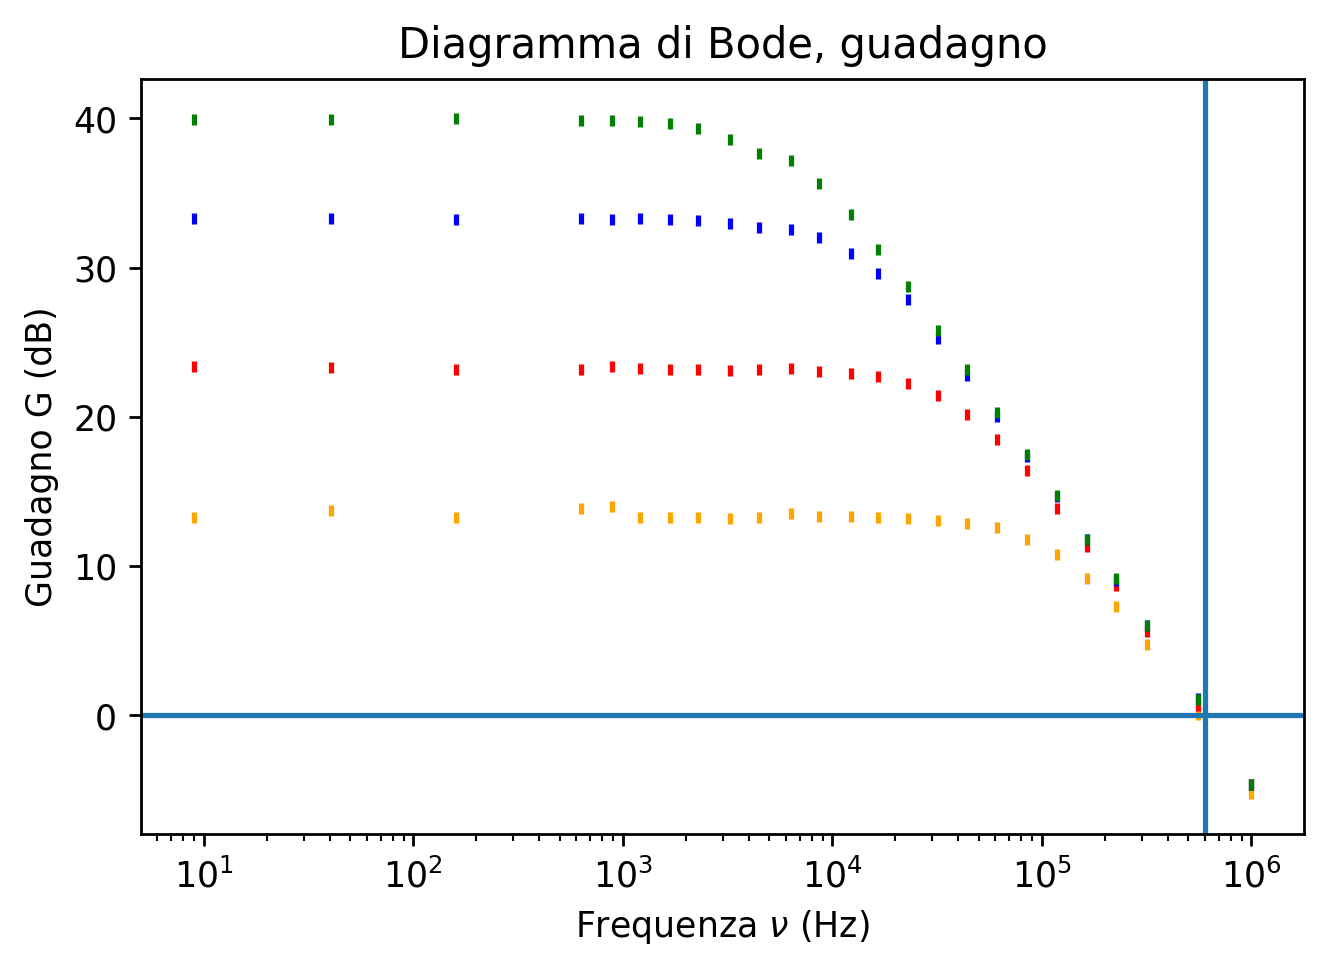

In [105]:
plt.errorbar(nu, G_1, sigmaG, color="orange", linestyle="")
plt.errorbar(nu, G_2, sigmaG, color="red", linestyle="")
plt.errorbar(nu, G_3, sigmaG, color="blue", linestyle="")
plt.errorbar(nu, G_4, sigmaG, color="green", linestyle="")
plt.xscale("log")
plt.title("Diagramma di Bode, guadagno")
plt.xlabel("Frequenza $\\nu$ (Hz)")
plt.ylabel("Guadagno G (dB)")

plt.axhline(0)
plt.axvline(600000)

In [101]:
def tabmaker(l):
    st = ""
    for i in range(len(l[0][1])):
        for j in range(len(l)):
            col = l[j]
            #print(col)
            st+="${}\pm{}$ & ".format(np.round(col[1][i], 4), np.round(col[0](col[1][i]), 2))
        st += " \\\ "
    return st

In [102]:
G_BW_2.mean()

265338.7011325452